In [3]:
import tellurium as te
# import roadrunner
# import antimony
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tempfile

In [4]:
r = te.loada ('''
model feedback()
  // Reactions:
  vGLT: -> GLCi;                                    p_GLT_VmGLT * (f_GLCo-GLCi / p_GLT_KeqGLT) / (p_GLT_KmGLTGLCo * (1+f_GLCo/p_GLT_KmGLTGLCo+GLCi / p_GLT_KmGLTGLCi + 0.91 * f_GLCo * GLCi / (p_GLT_KmGLTGLCi * p_GLT_KmGLTGLCo))); 
  vGLK: GLCi + ATP -> G6P + ADP;                    p_HXK_ExprsCor * (((p_HXK1_kcat * (f_HXK1+f_HXK2)) / (p_HXK1_Katp * p_HXK1_Kglc) * (ATP * GLCi-((ADP * G6P) / p_HXK1_Keq))) / ((1+ATP / p_HXK1_Katp+ADP / p_HXK1_Kadp) * (1 + GLCi / p_HXK1_Kglc+G6P / p_HXK1_Kg6p + p_T6P_ss / p_HXK1_Kt6p))); 
  vPGI: G6P -> F6P;                                 p_PGI_ExprsCor * ((((p_PGI1_kcat*f_PGI1) / p_PGI1_Kg6p) * (G6P-(F6P / p_PGI1_Keq))) / (1+G6P / p_PGI1_Kg6p+1+F6P / p_PGI1_Kf6p-1)); 
  vPFK: F6P + ATP -> F16BP + ADP;                   p_PFK_ExprsCor * ((p_PFK_kcat * f_PFK * p_PFK_gR * (F6P / p_PFK_Kf6p) * (ATP / p_PFK_Katp) * (1+(F6P / p_PFK_Kf6p)+(ATP / p_PFK_Katp)+p_PFK_gR * ((F6P / p_PFK_Kf6p) * (ATP / p_PFK_Katp)))) / ((1+F6P / p_PFK_Kf6p+ATP / p_PFK_Katp+(p_PFK_gR * (F6P / p_PFK_Kf6p) * (ATP / p_PFK_Katp))) ^ 2 + p_PFK_L * ((1+p_PFK_Ciatp * (ATP / p_PFK_Kiatp)) / (1+ATP / p_PFK_Kiatp)) ^ 2 * ((1+p_PFK_Camp * (AMP / p_PFK_Kamp)) / (1+AMP / p_PFK_Kamp)) ^ 2 * ((1+((p_PFK_Cf26bp*p_PFK_F26BP) / (p_PFK_Kf26bp))+((p_PFK_Cf16bp * F16BP) / (p_PFK_Kf16bp))) / (1+(p_PFK_F26BP / p_PFK_Kf26bp)+(F16BP / p_PFK_Kf16bp))) ^ 2 * (1+p_PFK_Catp * (ATP / p_PFK_Katp)) ^ 2)); 
  vALD: F16BP -> GLYCERAL3P + DHAP;                 p_FBA_ExprsCor * (((p_FBA1_kcat * f_FBA1) / p_FBA1_Kf16bp * (F16BP-(GLYCERAL3P * DHAP) / p_FBA1_Keq)) / (1+F16BP / p_FBA1_Kf16bp+(1+GLYCERAL3P / p_FBA1_Kglyceral3p) * (1+DHAP / p_FBA1_Kdhap)-1));
  vTPI: DHAP -> GLYCERAL3P;                         (((p_TPI1_kcat*f_TPI1) / p_TPI1_Kdhap * (DHAP-GLYCERAL3P / p_TPI1_Keq)) / (1+DHAP / p_TPI1_Kdhap+1+GLYCERAL3P / p_TPI1_Kglyceral3p-1));
  vGAPDH: GLYCERAL3P + NAD + PHOS -> BPG + NADH;    p_GAPDH_ExprsCor * ((((p_TDH1_kcat * (f_TDH1+f_TDH2+f_TDH3)) / (p_TDH1_Kglyceral3p * p_TDH1_Knad * p_TDH1_Kpi)) * (GLYCERAL3P * NAD * PHOS-(BPG * NADH) / p_TDH1_Keq)) / ((1+GLYCERAL3P / p_TDH1_Kglyceral3p) * (1+NAD / p_TDH1_Knad) * (1+ PHOS / p_TDH1_Kpi)+(1+BPG / p_TDH1_Kglycerate13bp) * (1+NADH / p_TDH1_Knadh)-1));
  vPGK: BPG + ADP -> P3G + ATP;                     p_PGK_ExprsCor * p_PGK_VmPGK * ((p_PGK_KeqPGK * BPG * ADP)-ATP * P3G) / (p_PGK_KmPGKATP*p_PGK_KmPGKP3G * (1+ADP / p_PGK_KmPGKADP + ATP / p_PGK_KmPGKATP) * (1+BPG/p_PGK_KmPGKBPG+P3G/p_PGK_KmPGKP3G));
  vPGM: P3G -> P2G;                                 p_PGM_ExprsCor * ((((p_GPM1_kcat * (f_GPM1+f_GPM2+f_GPM3)) / p_GPM1_K3pg) * (P3G-P2G / p_GPM1_Keq)) / (1+P3G / p_GPM1_K3pg+1+P2G / p_GPM1_K2pg-1));
  vENO: P2G -> PEP;                                 p_ENO_ExprsCor * ((((p_ENO1_kcat * (f_ENO1+f_ENO2)) / p_ENO1_K2pg) * (P2G-PEP / p_ENO1_Keq)) / (1+P2G / p_ENO1_K2pg+1+PEP / p_ENO1_Kpep-1));
  vPYK: PEP + ADP -> PYR + ATP;                     p_PYK_ExprsCor * ((((p_PYK1_kcat * (f_PYK1+f_PYK2)) / (p_PYK1_Kadp * p_PYK1_Kpep) * ADP * PEP) / ((1+ADP / p_PYK1_Kadp) * (1+PEP / p_PYK1_Kpep))) * ((PEP / p_PYK1_Kpep+1) ^ p_PYK1_hill / (p_PYK1_L * ((ATP / p_PYK1_Katp+1) / (F16BP / p_PYK1_Kf16bp+1)) ^ p_PYK1_hill+(PEP / p_PYK1_Kpep+1) ^ p_PYK1_hill)));
  vPDC: PYR -> ACE;                                 p_PDC_ExprsCor * ((p_PDC1_kcat * (f_PDC1) * (PYR / p_PDC1_Kpyr) ^ p_PDC1_hill) / (1+(PYR / p_PDC1_Kpyr) ^ p_PDC1_hill+ PHOS / p_PDC1_Kpi));
  vADH: ACE + NADH -> ETOH + NAD;                   -p_ADH_ExprsCor * (p_ADH_VmADH / (p_ADH_KiADHNAD * p_ADH_KmADHETOH) * (NAD * ETOH-NADH * ACE / p_ADH_KeqADH) / (1+NAD / p_ADH_KiADHNAD+p_ADH_KmADHNAD * ETOH / (p_ADH_KiADHNAD*p_ADH_KmADHETOH)+p_ADH_KmADHNADH * ACE / (p_ADH_KiADHNADH * p_ADH_KmADHACE) + NADH / p_ADH_KiADHNADH+NAD * ETOH / (p_ADH_KiADHNAD * p_ADH_KmADHETOH)+p_ADH_KmADHNADH * NAD * ACE / (p_ADH_KiADHNAD * p_ADH_KiADHNADH * p_ADH_KmADHACE) + p_ADH_KmADHNAD * ETOH * NADH / (p_ADH_KiADHNAD * p_ADH_KmADHETOH * p_ADH_KiADHNADH)+NADH * ACE / (p_ADH_KiADHNADH * p_ADH_KmADHACE) + NAD * ETOH * ACE / (p_ADH_KiADHNAD*p_ADH_KmADHETOH * p_ADH_KiADHACE)+ETOH * NADH * ACE / (p_ADH_KiADHETOH*p_ADH_KiADHNADH*p_ADH_KmADHACE)));
  vG3PDH: NADH + DHAP -> NAD + GLYC3P;              ((((p_GPD1_kcat * f_GPD1) / (p_GPD1_Kdhap * p_GPD1_Knadh)) * (DHAP * NADH-(GLYC3P * NAD) / p_GPD1_Keq)) / ((1+F16BP / p_GPD1_Kf16bp+ATP / p_GPD1_Katp+ADP / p_GPD1_Kadp) * (1+DHAP / p_GPD1_Kdhap+GLYC3P / p_GPD1_Kglyc3p) * (1+NADH / p_GPD1_Knadh+NAD / p_GPD1_Knad))); 
  vHOR2: GLYC3P -> GLYCEROL + PHOS;                 (((p_HOR2_kcat * f_HOR2) / p_HOR2_Kglyc3p * GLYC3P) / ((1+ PHOS / p_HOR2_Kpi) * (1+GLYC3P / p_HOR2_Kglyc3p)));
  vPGM1: G1P -> ;                                   0;
  vTPS1: G1P + ATP -> T6P + ADP + 2 PHOS;           0;
  vTPS2: T6P -> TRE + PHOS;                         0;
  vNTH1: TRE -> ;                                   0;
  vVacPi: -> PHOS;                                  p_vacuolePi_k * (p_vacuolePi_steadyStatePi- PHOS);
  vADK1: 2 ADP -> ATP + AMP;                        p_ADK1_k * ((ADP * ADP)-(AMP * ATP) / p_ADK1_Keq);
  vmitoNADH: NADH -> NAD;                           p_mitoNADHVmax * (NADH / (NADH + p_mitoNADHKm));
  vAmd1: AMP -> IMP;                                0;
  vAde1312: IMP -> AMP;                             0;
  vIsn1: IMP -> INO + PHOS;                         0; 
  vPnp1: INO -> HYP;                                0;
  vHpt1: HYP + PHOS -> IMP;                         0;
  vETOHt: ETOH -> ;                                 p_kETOHtransport*(ETOH-f_ETOH_e);
  vGLYCt: GLYCEROL -> ;                             p_GlycerolTransport * (GLYCEROL-f_GLYCEROL_e); 
  vATPase: ATP -> ADP + PHOS;                       gam_ngam * ATP  /  ADP * adp_atp_ratio;
  vmito: ADP + PHOS -> ATP;                         (-poly_sinkPYR * (PYR / (PYR + km_sinkPYR)) * 3 + p_PDC_ExprsCor * ((p_PDC1_kcat * (f_PDC1) * (PYR / p_PDC1_Kpyr) ^ p_PDC1_hill) / (1+(PYR / p_PDC1_Kpyr) ^ p_PDC1_hill+ PHOS / p_PDC1_Kpi)) * 1)/RQ * 0.95;  
  vsinkG6P: PHOS -> G6P;                            poly_sinkG6P * (G6P / (G6P + km_sinkG6P));
  vsinkF6P: PHOS -> F6P;                            poly_sinkF6P * (F6P / (F6P + km_sinkF6P));
  vsinkGAP: PHOS -> GLYCERAL3P;                     poly_sinkGAP * (GLYCERAL3P / (GLYCERAL3P + km_sinkGAP)); 
  vsinkP3G: PHOS -> P3G;                            poly_sinkP3G * (P3G / (P3G + km_sinkP3G));
  vsinkPEP: PHOS -> PEP;                            poly_sinkPEP * (PEP / (PEP + km_sinkPEP));
  vsinkPYR: -> PYR;                                 poly_sinkPYR * (PYR / (PYR + km_sinkPYR));
  vsinkACE: -> ACE;                                 poly_sinkACE * (ACE / (ACE + km_sinkACE));
  
  // Species initializations:
  ACE = 0.0400;
  BPG = 0;
  F16BP = 0.2050;
  F6P = 0.6600;
  G6P = 2.4950;
  GLCi = 0.2000;
  NAD = 1.5794;
  NADH = 0.0106;
  ATP = 3.2965; #2.2150; # experimental data SS @ 0.1h-1
  P2G = 0.3410;
  P3G = 3.0150;
  PEP = 1.3400; 
  PYR = 0.3250; 
  GLYCERAL3P = 0.0100; 
  ADP = 0.8925; #0.5300;  # experimental data SS @ 0.1h-1
  AMP = 0.2585; #0.0347; # experimental data SS @ 0.1h-1
  DHAP = 0.1815; 
  GLYC3P = 0.0300; 
  GLYCEROL = 0.1000; 
  ETOH = 10.0000; 
  G1P = 0.1300;
  TRE = 56.1303;
  # T6P = 0.1000; 
  PHOS = 10;
  IMP = 0.1000; 
  INO = 0.1000;
  HYP = 1.5000; 
  ETOHec = 0; 
  GLYCec = 0.0900; 

  // Variable initialization:
  p_GLT_KeqGLT = 1; 
  p_GLT_KmGLTGLCi = 1.0078; 
  p_GLT_KmGLTGLCo = 1.0078; 
  p_HXK1_Kadp = 0.3492;
  p_HXK1_Katp = 0.0931;
  p_HXK1_Keq = 3.7213e+03;
  p_HXK1_Kg6p = 34.7029;
  p_HXK1_Kglc = 0.3483;
  p_HXK1_Kt6p = 0.0073;
  p_HXK1_kcat = 6.2548;
  p_PFK_Camp = 0.0287;
  p_PFK_Catp = 1.2822;
  p_PFK_Cf16bp = 2.3638;
  p_PFK_Cf26bp = 0.0283;
  p_PFK_Ciatp = 40.3824;
  p_PFK_Kamp = 0.0100;
  p_PFK_Katp = 1.9971;
  p_PFK_Kf16bp = 0.0437;
  p_PFK_Kf26bp = 0.0012;
  p_PFK_Kf6p = 0.0589; #0.9166; # different UG Km between SS and GP simulations
  p_PFK_Kiatp = 4.9332;
  p_PFK_L = 1.3886;
  p_PFK_gR = 1.8127;
  p_PFK_kcat = 8.7826;
  p_PFK_F26BP = 1e-3;  
  p_PGI1_Keq = 0.9564;
  p_PGI1_Kf6p = 7.2433; 
  p_PGI1_Kg6p = 7.9987; #33.0689;  # different UG Km between SS and GP simulations
  p_PGI1_kcat = 2.3215; 
  p_FBA1_Kdhap = 0.0300;
  p_FBA1_Keq = 0.1223;
  p_FBA1_Kf16bp = 0.6872;
  p_FBA1_Kglyceral3p = 3.5582;
  p_FBA1_kcat = 4.4067;
  p_TPI1_Kdhap = 1.2887; #205.9964;  # different UG Km between SS and GP simulations
  p_TPI1_Keq = 0.0515;
  p_TPI1_Kglyceral3p = 8.8483;
  p_TPI1_kcat = 16.1694;
  p_GPM1_K2pg = 0.0750;
  p_GPM1_K3pg = 1.4151;
  p_GPM1_Keq = 0.1193;
  p_GPM1_kcat = 11.3652;
  p_ENO1_K2pg = 0.0567;
  p_ENO1_Keq = 4.3589;
  p_ENO1_Kpep = 0.4831;
  p_ENO1_kcat = 3.3018;
  p_PYK1_Kadp = 0.2430;
  p_PYK1_Katp = 9.3000;
  p_PYK1_Kf16bp = 0.1732;
  p_PYK1_Kpep = 0.2810;
  p_PYK1_L = 60000;
  p_PYK1_hill = 4;
  p_PYK1_kcat = 9.3167;
  p_TDH1_Keq = 0.0054;
  p_TDH1_Kglyceral3p = 0.5145; #4.5953;  # different Km between SS and GP simulations
  p_TDH1_Kglycerate13bp = 0.9076;
  p_TDH1_Knad = 1.1775;
  p_TDH1_Knadh = 0.0419;
  p_TDH1_Kpi = 0.7731;
  p_TDH1_kcat = 78.6422;
  p_PGK_KeqPGK = 3.2348e+03;
  p_PGK_KmPGKADP = 0.2064;
  p_PGK_KmPGKATP = 0.2859;
  p_PGK_KmPGKBPG = 0.0031;
  p_PGK_KmPGKP3G = 0.4759;
  p_PGK_VmPGK = 55.1626;
  p_GPD1_Kadp = 1.1069;
  p_GPD1_Katp = 0.5573;
  p_GPD1_Kdhap = 2.7041;
  p_GPD1_Keq = 1.0266e+04;
  p_GPD1_Kf16bp = 12.7519;
  p_GPD1_Kglyc3p = 3.2278;
  p_GPD1_Knad = 0.6902;
  p_GPD1_Knadh = 0.0322;
  p_GPD1_kcat = 1.7064;
  p_PDC1_Kpi = 9.4294;
  p_PDC1_Kpyr = 12.9680;
  p_PDC1_hill = 0.7242;
  p_PDC1_kcat = 8.3613;
  p_ADH_KeqADH = 6.8487e-05; 
  p_ADH_KiADHACE = 0.6431; 
  p_ADH_KiADHETOH = 59.6935; 
  p_ADH_KiADHNAD = 0.9677; 
  p_ADH_KiADHNADH = 0.0316; 
  p_ADH_KmADHACE = 1.1322; 
  p_ADH_KmADHETOH = 4.8970; 
  p_ADH_KmADHNAD = 0.1534; 
  p_ADH_KmADHNADH = 0.1208; 
  p_ADH_VmADH = 13.2581; 
  p_HOR2_Kglyc3p = 2.5844;
  p_HOR2_Kpi = 2.5491;
  p_HOR2_kcat = 1.2748;
  p_PGM1_Keq = 21.3955;
  p_PGM1_Kg1p = 0.0653;
  p_PGM1_Kg6p = 0.0324;
  p_PGM1_kcat = 8.4574;
  p_TPS1_Kg6p = 4.5359;
  p_TPS1_Kudp_glc = 0.1268;
  p_TPS1_kcat = 9.6164e+03;
  p_TPS1_Kpi = 0.7890;
  p_TPS1_KmF6P = 1.5631;
  p_TPS2_Kt6p = 0.3686;
  p_TPS2_kcat = 28.4097;
  p_TPS2_Kpi = 0.7023;
  p_NTH1_Ktre = 2.1087;
  p_NTH1_kcat = 4.5132;
  p_GlycerolTransport = 0.1001;
  p_kETOHtransport = 0.0328;
  p_mitoNADHKm = 1.0000e-03;
  p_mitoVmax = 1.6034;
  p_mitoADPKm = 0.3394;
  p_mitoPiKm = 0.4568;
  p_ATPaseK = 0.0346;
  p_Amd1_Vmax = 9.8464;
  p_Amd1_K50 = 10.9184;
  p_Amd1_Kpi = 1.6184e+03;
  p_Ade13_Ade12_k = 0.6298;
  p_Isn1_k = 0.3654;
  p_Pnp1_k = 0.0149;
  p_Hpt1_k = 0.0112;
  p_Amd1_Katp = 5000;
  p_ATPase_Katp = 0;
  p_ATPase_ratio = 0.2500;
  p_vacuolePi_k = 0.1699;
  p_vacuolePi_steadyStatePi = 10;
  p_ADK1_k = 77.3163;
  p_ADK1_Keq = 0.2676;
  km_sinkACE = 1e-04;
  km_sinkF6P = 1e-04; 
  km_sinkG6P = 1e-02;
  km_sinkGAP = 5e-04;
  km_sinkP3G = 1e-03;
  km_sinkPEP = 1e-03;
  km_sinkPYR = 1e-03;
  f_GLK1 = 0; 
  f_HXK1 = 1; 
  f_HXK2 = 0; 
  f_PGI1 = 1; 
  f_PFK = 1; 
  f_FBA1 = 1; 
  f_GPD1 = 1; 
  f_GPD2 = 0; 
  f_TDH1 = 1; 
  f_TDH2 = 0; 
  f_TDH3 = 0; 
  f_PGK1 = 0.1320; 
  f_GPM1 = 1; 
  f_GPM2 = 0; 
  f_GPM3 = 0; 
  f_ENO1 = 1; 
  f_ENO2 = 0; 
  f_PYK1 = 1; 
  f_PYK2 = 0; 
  f_PDC1 = 0.5290; 
  f_PDC5 = 0.0059; 
  f_PDC6 = 0.0034; 
  f_ADH1 = 0.0933; 
  f_ADH2 = 0; 
  f_ADH3 = 0.0019; 
  f_ADH4 = 0.0359; 
  f_ADH5 = 0.0023; 
  f_ADH6 = 0.0171; 
  f_ADH7 = 0; 
  f_TPI1 = 1; 
  f_HOR2 = 1; 
  f_RHR2 = 0; 
  f_PGM1 = 1; 
  f_PGM2 = 0; 
  f_PGM3 = 0; 
  f_UGP1 = 3.1000e-04; 
  f_TPS2 = 0.0013; 
  f_NTH1 = 0.0020; 
  f_TPS1 = 0.0014; # 0.00145;  
  f_CO2 = 1; 
  f_GLY = 0.1500; 
  f_Glyc = 0; 
  f_SUCC = 0; 
  f_Trh = 0; 
  f_X = 0; 
  f_GLYCEROL_e = 0; 
  f_ETOH_e = 0; 
  f_TRE_e = 0; 
  UDP_GLC = 0.07;
  
  # adjustments at each growth rate
  p_GLT_VmGLT       := piecewise(8.1327, time < 3000, 0.6542, time < 6000, 4.6312, time < 9000, 8.1327, time < 12000, 8.1327, time < 15000, 10.3680, time < 18000, 23.2111, time < 21000, 13.3566, time < 24000, 11.6331);  # p_GLT_VmGLT = 8.1327;
  # p_GLT_VmGLT       := piecewise(11.6331, time > 24000, 13.3566, time > 21000, 23.2111, time > 18000, 10.3680, time > 15000, 8.1327, time > 12000, 8.1327, time > 9000, 4.6312, time > 6000, 0.6542, time > 3000, 8.1327)
  
  p_HXK_ExprsCor    := piecewise(1, time < 3000, 1.3487, time < 6000, 1.2015, time < 9000, 1, time < 12000, 0.6553, time < 15000, 0.4138, time < 18000, 0.3693, time < 21000, 0.3639, time < 24000, 0.3768);  # p_HXK_ExprsCor = 1;
  p_PGI_ExprsCor    := piecewise(1, time < 3000, 1.0019, time < 6000, 1.0012, time < 9000, 1, time < 12000, 0.9976, time < 15000, 0.9953, time < 18000, 0.9947, time < 21000, 0.9940, time < 24000, 1.0061);  # p_PGI_ExprsCor = 1;
  p_PFK_ExprsCor    := piecewise(1, time < 3000, 1.0032, time < 6000, 1.0020, time < 9000, 1, time < 12000, 0.9805, time < 15000, 0.9748, time < 18000, 0.9956, time < 21000, 1.0686, time < 24000, 1.2072);  # p_PFK_ExprsCor = 1;
  p_FBA_ExprsCor    := piecewise(1, time < 3000, 1.1341, time < 6000, 1.0715, time < 9000, 1, time < 12000, 0.8582, time < 15000, 0.8481, time < 18000, 1.0446, time < 21000, 1.2799, time < 24000, 1.5947);  # p_FBA_ExprsCor = 1;
  p_TPI_ExprsCor    := piecewise(1, time < 3000, 1.2507, time < 6000, 1.1140, time < 9000, 1, time < 12000, 0.8783, time < 15000, 1.0878, time < 18000, 1.2270, time < 21000, 1.3668, time < 24000, 1.5116);  # p_TPI_ExprsCor = 1;
  p_GAPDH_ExprsCor  := piecewise(1, time < 3000, 1.5232, time < 6000, 1.3116, time < 9000, 1, time < 12000, 0.6622, time < 15000, 0.8659, time < 18000, 0.9867, time < 21000, 1.1195, time < 24000, 1.3605);  # p_GAPDH_ExprsCor = 1;
  p_PGK_ExprsCor    := piecewise(1, time < 3000, 1.3247, time < 6000, 1.2053, time < 9000, 1, time < 12000, 0.6318, time < 15000, 0.4588, time < 18000, 0.4547, time < 21000, 0.4870, time < 24000, 0.5581);  # p_PGK_ExprsCor = 1;
  p_PGM_ExprsCor    := piecewise(1, time < 3000, 1.3484, time < 6000, 1.1996, time < 9000, 1, time < 12000, 0.7295, time < 15000, 0.8628, time < 18000, 1.1695, time < 21000, 1.5264, time < 24000, 1.9663);  # p_PGM_ExprsCor = 1;
  p_ENO_ExprsCor    := piecewise(1, time < 3000, 1.6031, time < 6000, 1.3607, time < 9000, 1, time < 12000, 0.5730, time < 15000, 0.8098, time < 18000, 1.1902, time < 21000, 1.6722, time < 24000, 2.1527);  # p_ENO_ExprsCor = 1;
  p_PYK_ExprsCor    := piecewise(1, time < 3000, 1.1724, time < 6000, 1.1071, time < 9000, 1, time < 12000, 0.8751, time < 15000, 1.2257, time < 18000, 1.5879, time < 21000, 2.0238, time < 24000, 2.5581);  # p_PYK_ExprsCor = 1;
  p_PDC_ExprsCor    := piecewise(1, time < 3000, 1.3175, time < 6000, 1.2990, time < 9000, 1, time < 12000, 0.8530, time < 15000, 1.2168, time < 18000, 1.7136, time < 21000, 2.2674, time < 24000, 2.6421);  # p_PDC_ExprsCor = 1;
  p_ADH_ExprsCor    := piecewise(1, time < 3000, 1.3114, time < 6000, 1.1963, time < 9000, 1, time < 12000, 0.6308, time < 15000, 0.3534, time < 18000, 0.3211, time < 21000, 0.3737, time < 24000, 0.5070);  # p_ADH_ExprsCor = 1;

  # p_HXK_ExprsCor    := piecewise(1, time < 3000, 1.3487, time < 6000, 1.2015, time < 9000, 1, time < 12000, 0.6553, time < 15000, 0.4138, time < 18000, 0.3693, time < 21000, 0.3639, time < 24000, 0.3768);  # p_HXK_ExprsCor = 1;
  # p_HXK_ExprsCor    := piecewise(0.3768, time > 24000, 0.3639, time > 21000, 0.3693, time > 18000, 0.4138, time > 15000, 0.6553, time > 12000, 1, time > 9000, 1.2015, time > 6000, 1.3487, time > 3000, 1)

  f_GLCo            := piecewise(0.18, time < 3000, 0.13, time < 6000, 0.15, time < 9000, 0.18, time < 12000, 0.19, time < 15000, 0.45, time < 18000, 0.55, time < 21000, 1.44, time < 24000, 3.27);  # p_GLT_VmGLT = 8.1327;
  # f_GLCo            := piecewise(3.27, time > 24000, 1.44, time > 21000, 0.55, time > 18000, 0.45, time > 15000, 0.19, time > 12000, 0.18, time > 9000, 0.15, time > 6000, 0.13, time > 3000, 0.18)
  
  poly_sinkACE      := piecewise(-0.034836166800000, time < 3000,-0.004975742582963, time < 6000,-0.020186833590625, time < 9000,-0.034836166800000, time < 12000,-0.065292659200000, time < 15000,-0.111215459200000, time < 18000,-0.132240245949756, time < 21000,-0.162977488253125, time < 24000,-0.208477651214599);  # poly_sinkACE = -0.034836166800000; 
  poly_sinkF6P      := piecewise( 0.024574614000000, time < 3000, 0.003026524171136, time < 6000, 0.013953679906250, time < 9000, 0.024574614000000, time < 12000, 0.051417536000000, time < 15000, 0.080134506000000, time < 18000, 0.081401992032715, time < 21000, 0.080717012281250, time < 24000, 0.080855113220215);  # 
  poly_sinkG6P      := piecewise(-0.077853600000000, time < 3000,-0.017459276800000, time < 6000,-0.038929075000000, time < 9000,-0.077853600000000, time < 12000,-0.157532800000000, time < 15000,-0.221225200000000, time < 18000,-0.232059065625000, time < 21000,-0.240166225000000, time < 24000,-0.245201171875000);  # 
  poly_sinkGAP      := piecewise( 0.012626909700000, time < 3000, 0.004537961086061, time < 6000, 0.007904085229688, time < 9000, 0.012626909700000, time < 12000, 0.029838700800000, time < 15000, 0.046159701300000, time < 18000, 0.047472185327710, time < 21000, 0.048312822192187, time < 24000, 0.050227575302124);  # 
  poly_sinkP3G      := piecewise(-0.007881000000000, time < 3000,-0.003915240000000, time < 6000,-0.005045250000000, time < 9000,-0.007881000000000, time < 12000,-0.017124000000000, time < 15000,-0.031129000000000, time < 18000,-0.035374312500000, time < 21000,-0.039917250000000, time < 24000,-0.044757812500000);  # 
  poly_sinkPEP      := piecewise(-0.007607000000000, time < 3000,-0.002059480000000, time < 6000,-0.004044250000000, time < 9000,-0.007607000000000, time < 12000,-0.015688000000000, time < 15000,-0.025043000000000, time < 18000,-0.027580812500000, time < 21000,-0.030198250000000, time < 24000,-0.032895312500000);  # 
  poly_sinkPYR      := piecewise(-0.161328300000000, time < 3000,-0.040458886419200, time < 6000,-0.084098614062500, time < 9000,-0.161328300000000, time < 12000,-0.318315200000000, time < 15000,-0.471292700000000, time < 18000,-0.453914815356447, time < 21000,-0.412421276562492, time < 24000, -0.371103372192381);  # 
  
  p_mitoNADHVmax    := piecewise(0.2401, time < 3000, 0.1348, time < 6000, 0.1661, time < 9000, 0.2401, time < 12000, 0.5082, time < 15000, 1.0551, time < 18000, 0.9711, time < 21000, 0.7965, time < 24000, 0.6539);  # p_mitoNADHVmax = 0.2401;
  
  RQ                := piecewise(1.04, time < 3000, 1.05, time < 6000, 1.04, time < 9000, 1.04, time < 12000, 1.05, time < 15000, 1.48, time < 18000, 1.66, time < 21000, 2.80, time < 24000, 4.31);  # p_GLT_VmGLT = 8.1327; # RQ = 1.04;
  gam_ngam          := piecewise(0.9306, time < 3000, 0.2639, time < 6000, 0.5139, time < 9000, 0.9306, time < 12000, 1.7639, time < 15000, 2.5972, time < 18000, 2.8056, time < 21000, 3.0139, time < 24000, 3.2222);  # gam_ngam = 0.9306;
  adp_atp_ratio     := piecewise(0.2707, time < 3000, 0.2746, time < 6000, 0.2692, time < 9000, 0.2707, time < 12000, 0.2726, time < 15000, 0.2407, time < 18000, 0.2388, time < 21000, 0.1592, time < 24000, 0.1652);  # adp_atp_ratio = 0.2707;
  
  p_T6P_ss          := piecewise(0.1000, time < 3000, 0.1550, time < 6000, 0.1850, time < 9000, 0.1000, time < 12000, 0.0550, time < 15000, 0.0100, time < 18000, 0.0100, time < 21000, 0.0150, time < 24000, 0.0150);  # p_GLT_VmGLT = 8.1327;
  # p_T6P_ss          := piecewise(0.0150, time > 24000, 0.0150, time > 21000, 0.0100, time > 18000, 0.0100, time > 15000, 0.0550, time > 12000, 0.1000, time > 9000, 0.1850, time > 6000, 0.1550, time > 3000, 0.1000)
  # DRAFT             := piecewise(8, time > 24000, 7, time > 21000, 6, time > 18000, 5, time > 15000, 4, time > 12000, 3, time > 9000, 2, time > 6000, 1, time > 3000, 3a)
  
  # total nucleotides pool adjusted to dilution rate-dependency
  E1: at ((time > 3000) && (time < 3001)): ATP=2.8280, ADP=0.7765, AMP=0.2290;
  E2: at ((time > 6000) && (time < 6001)): ATP=3.2825, ADP=0.8835, AMP=0.2455;
  E3: at ((time > 9000) && (time < 9001)): ATP=3.2965, ADP=0.8925, AMP=0.2585;
  E4: at ((time > 12000) && (time < 12001)): ATP=3.7320, ADP=1.0175, AMP=0.3010;
  E5: at ((time > 15000) && (time < 15001)): ATP=3.4540, ADP=0.8315, AMP=0.1875;
  E6: at ((time > 18000) && (time < 18001)): ATP=3.3985, ADP=0.8115, AMP=0.2000;
  E7: at ((time > 21000) && (time < 21001)): ATP=3.0315, ADP=0.4825, AMP=0.0930;
  E8: at ((time > 24000) && (time < 24001)): ATP=2.9025, ADP=0.4795, AMP=0.1120;
    
end''')


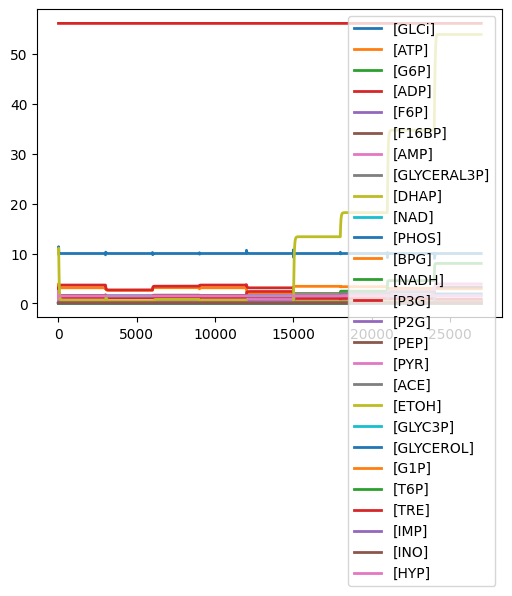

Text(0, 0.5, '[FBP]ss (mM)')

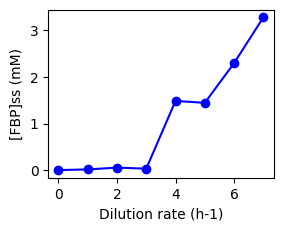

In [6]:


# simulation
result = r.simulate(0, 27000, 27001)
r.plot(result)

# plot 
all_id = ["time","[GLCi]","[G6P]","[F6P]","[F16BP]","[AMP]","[GLYCERAL3P]","[DHAP]","[NADH]","[P3G]","[P2G]","[PEP]","[PYR]","[GLYC3P]","[G1P]"];
time_points = [6000,9000,12000,15000,18000,21000,24000,27000];
time = result[:,0];
met = result[:,6];
time_array = time[time_points];
met_array = met[time_points];

plt.figure()
plt.subplot(221)
plt.plot(met_array,'bo-')
plt.xlabel('Dilution rate (h-1)')
plt.ylabel('[FBP]ss (mM)')